In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

pd.set_option('display.max_columns', None) 

import warnings
warnings.filterwarnings("ignore")

### Divisón

-Grupo A (Control): Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5.

-Grupo B (Variante): Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala.

### Pasos

1. Divide a los empleados en los grupos A y B según los criterios establecidos.

2. Calcula la tasa de rotación (porcentaje de empleados que dejaron la empresa) en cada grupo.

3. Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.

4. Analiza los resultados.

5. Calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.

In [2]:
df = pd.read_csv("Datos/datos_empresa_final.csv", index_col=0)
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,remotework,id_encuesta
0,51,No,Travel rarely,684.0,Unknown,6,3,1,M,51.0,3,5,Research director,3,Other,6462,7,No,13,3.0,3,0,10.0,5,3.0,20,15,15,1972,Yes,1
1,52,No,Travel rarely,699.0,Unknown,1,4,3,M,65.0,2,5,Manager,3,Other,5678,0,No,14,3.0,1,1,34.0,5,3.0,33,11,9,1971,Yes,2
2,42,No,Travel rarely,532.0,Research & development,4,2,3,M,58.0,3,5,Manager,4,Married,4933,1,No,11,3.0,4,0,22.0,3,3.0,22,11,15,1981,Yes,3
3,47,No,Travel rarely,359.0,Unknown,2,4,1,F,82.0,3,4,Research director,3,Married,26703,3,No,19,3.0,2,2,10.0,2,3.0,20,5,6,1976,No,4
4,46,No,Travel rarely,1319.0,Unknown,3,3,1,F,45.0,4,4,Sales executive,1,Divorced,7739,2,No,12,3.0,4,1,10.0,5,3.0,19,2,8,1977,No,5


In [3]:
# Paso 1: dividir los dos grupos bajo los criterios establecidos.

df_group_A = df.loc[df["jobsatisfaction"] >= 3]
df_group_B = df.loc[df["jobsatisfaction"] < 3]

In [4]:
# Paso 2: Calculamos el % de "Yes" en attrition del grupo A

round(df_group_A.loc[df_group_A["attrition"] == "Yes"].shape[0] / df_group_A[["attrition", "jobsatisfaction"]].shape[0] * 100, 2)

13.67

In [5]:
# Paso 2: Calculamos el % de "Yes" en attrition del grupo B

round(df_group_B.loc[df_group_B["attrition"] == "Yes"].shape[0] / df_group_B[["attrition", "jobsatisfaction"]].shape[0] * 100, 2)

19.87

In [6]:
# Paso 3: hacer análisis estadístico.

tabla_contingencia_A = pd.crosstab(df_group_A['attrition'], df_group_A['jobsatisfaction'], normalize=True, margins=True) * 100

tabla_contingencia_A

jobsatisfaction,3,4,All
attrition,,,
No,40.703518,45.628141,86.331658
Yes,7.638191,6.030151,13.668342
All,48.341709,51.658291,100.000000


In [7]:
tabla_contingencia_B = pd.crosstab(df_group_B['attrition'], df_group_B['jobsatisfaction'], normalize=True, margins=True) * 100

tabla_contingencia_B

jobsatisfaction,1,2,All
attrition,,,
No,39.903069,40.226171,80.129241
Yes,11.308562,8.562197,19.870759
All,51.211632,48.788368,100.000000


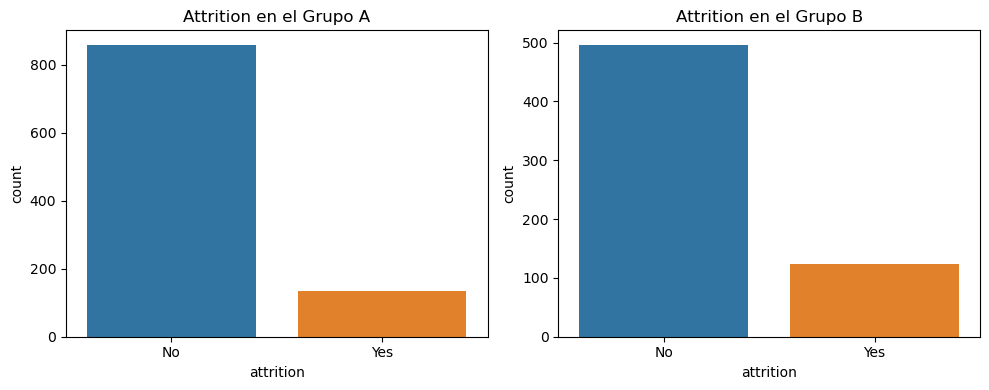

In [8]:
# Crear subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Gráfico 1: Attrition en el Grupo A
sns.countplot(ax=axes[0], data=df_group_A, x='attrition')
axes[0].set_title('Attrition en el Grupo A')

# Gráfico 2: Attrition en el Grupo B
sns.countplot(ax=axes[1], data=df_group_B, x='attrition')
axes[1].set_title('Attrition en el Grupo B')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [9]:
# Tablas de contingencia de ambis grupos
tabla_contingencia_A = pd.crosstab(df_group_A['attrition'], df_group_A['jobsatisfaction'], normalize=True, margins=True) * 100
tabla_contingencia_B = pd.crosstab(df_group_B['attrition'], df_group_B['jobsatisfaction'], normalize=True, margins=True) * 100

# Las juntamos para que sean solo una.
tabla_contingencia_combined = pd.concat([tabla_contingencia_A, tabla_contingencia_B], axis=1, keys=['Group_A', 'Group_B'])
# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(tabla_contingencia_combined)
# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa en las tasas de attrition entre el Grupo A y el Grupo B.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de attrition son distintas.
          Por lo tanto, hay una diferencia significativa en la rotación entre los grupos de satisfacción.
          """)
else:
    print("No hay evidencia de una diferencia significativa en las tasas de attrition entre los grupos.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que no existe evidencia estadística para afirmar que las tasas de attrition son distintas.
          """)

No hay evidencia de una diferencia significativa en las tasas de attrition entre los grupos.

 ---------- 


          Los resultados sugieren que no existe evidencia estadística para afirmar que las tasas de attrition son distintas.
          


In [13]:
# Realizar la prueba de proporciones
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_combined)
# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa en las tasas de clics entre el Grupo de Control y el Grupo de Prueba.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas.
          """)
else:
    print("No hay evidencia de una diferencia significativa entre los grupos.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas.
          """)

No hay evidencia de una diferencia significativa entre los grupos.

 ---------- 


          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas.
          


In [14]:
# Paso 5
# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_combined)

# Imprimir los resultados
print(f"Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

# Interpretar el valor p
alpha = 0.05
if p < alpha:
    print(f"Se rechaza la hipótesis nula (p < {alpha}). Hay evidencia suficiente para decir que las variables están asociadas.")
else:
    print(f"No se rechaza la hipótesis nula (p >= {alpha}). No hay evidencia suficiente para decir que las variables están asociadas.")

Chi-cuadrado: 3.428755020865337
Valor p: 0.9694622449729037
Grados de libertad: 10
Frecuencias esperadas:
[[ 40.23502132  42.99542818  83.2304495   42.62367123  40.60677827
   83.2304495 ]
 [  8.10668723   8.66286327  16.7695505    8.58796043   8.18159007
   16.7695505 ]
 [ 48.34170854  51.65829146 100.          51.21163166  48.78836834
  100.        ]]
No se rechaza la hipótesis nula (p >= 0.05). No hay evidencia suficiente para decir que las variables están asociadas.


In [15]:
# Prueba de confianza
# Mostrar resultados
nivel_confianza = 0.95  # Nivel de confianza estándar
alpha = 1 - nivel_confianza

print(f"Nivel de Confianza: {nivel_confianza}")
print(f"Valor de alpha: {alpha}")
print(f"Chi-cuadrado Calculado: {chi2:.2f}")
print(f"Valor p: {p:.4f}")
print(f"Grados de Libertad: {dof}")

# Interpretación
if p < alpha:
    print(f"\nSe rechaza la hipótesis nula (p < {alpha:.2f}).")
    print("Hay evidencia suficiente para decir que las variables están asociadas.")
else:
    print(f"\nNo se rechaza la hipótesis nula (p >= {alpha:.2f}).")
    print("No hay evidencia suficiente para decir que las variables están asociadas.")

Nivel de Confianza: 0.95
Valor de alpha: 0.050000000000000044
Chi-cuadrado Calculado: 3.43
Valor p: 0.9695
Grados de Libertad: 10

No se rechaza la hipótesis nula (p >= 0.05).
No hay evidencia suficiente para decir que las variables están asociadas.
